In [2]:
'''
将模型预测的全部双突变突变体合并到一个 dataframe 里；
并根据预测值排序。
'''
import pandas as pd
import os
from tqdm import tqdm

model_name = "PtsRep"
all_file_path = f"/share/jake/github/low_n_output/method_2/original_result/lin/{model_name}_use_bright_1_train_num_1000_do_method3_0_seed_0"

gfp_wt = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"
all_file_list = os.listdir(all_file_path)

all_2_mut_dict = {"name": [], "seq": [], f"{model_name}_predict": []}

for file in tqdm(all_file_list):
    temp_df = pd.read_csv(os.path.join(all_file_path, file))
    all_2_mut_dict["name"] += temp_df["name"].to_list()
    all_2_mut_dict["seq"] += temp_df["seq"].to_list()
    all_2_mut_dict[f"{model_name}_predict"] += temp_df[f"{model_name}_predict"].to_list()
    
all_2_mut_df = pd.DataFrame(all_2_mut_dict)
all_2_mut_df.sort_values(by = f"{model_name}_predict", ascending=False, inplace = True)
all_2_mut_df = all_2_mut_df.reset_index(drop = True)

print(all_2_mut_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/share/jake/github/low-n_software/original_result/lin/PtsRep_train_num_1000_seed_0'

In [14]:
'''
从全部双突变突变体中筛选出预测值最高的258个突变体（预测荧光亮度高于1.04）
识别突变体的突变位点和突变氨基酸，并将这些信息添加到 dataframe 中。
'''
top_258_df = all_2_mut_df[:258]
classfy_df = pd.DataFrame()

classfy_df["name"] = top_258_df["name"].to_list()
classfy_df["seq"] = top_258_df["seq"].to_list()
classfy_df[f"{model_name}_predict"] = top_258_df[f"{model_name}_predict"].to_list()
# print(classfy_df.head())
mutation_pos = []
wt_amion = []
mutation_amion = []
first_pos_list = []
second_pos_list = []
for i in tqdm(range(len(top_258_df))):
    mut_sites = top_258_df["name"].to_list()[i]
    mut_seq = top_258_df["seq"].to_list()[i]
    
    first_pos = int(mut_sites.split(" ")[0])
    second_pos = int(mut_sites.split(" ")[1])
    mutation_pos.append(f"{first_pos+1} {second_pos+1}")#将从0开始计数统一到从1开始。
    wt_amion.append(f"{gfp_wt[first_pos]} {gfp_wt[second_pos]}")
    mutation_amion.append(f"{mut_seq[first_pos]} {mut_seq[second_pos]}")
    assert gfp_wt[first_pos] != mut_seq[first_pos]
    assert gfp_wt[second_pos] != mut_seq[second_pos]
    first_pos_list.append(f"{gfp_wt[first_pos]}_{first_pos+1}_{mut_seq[first_pos]}")#将从0开始计数统一到从1开始。
    second_pos_list.append(f"{gfp_wt[second_pos]}_{second_pos+1}_{mut_seq[second_pos]}")#将从0开始计数统一到从1开始。
classfy_df["mutation_pos"] = mutation_pos
classfy_df["wt_amion"] = wt_amion
classfy_df["mutation_amion"] = mutation_amion
classfy_df["first_pos"] = first_pos_list
classfy_df["second_pos"] = second_pos_list
print(classfy_df.head())
classfy_df.to_csv(f"/share/jake/github/low_n_output/method_2/temp/{model_name}_method2_use_bright_1_train_num_1000_top258_double_mutations_seed_0.csv")

100%|██████████| 258/258 [00:00<00:00, 20753.13it/s]

      name                                                seq  PtsRep_predict  \
0   14 200  MSKGEELFTGVVPIWVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...        1.132407   
1  162 200  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...        1.121595   
2  170 200  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...        1.120349   
3    33 34  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGWCDATYGKLTLKF...        1.119656   
4   12 200  MSKGEELFTGVVQILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...        1.115216   

  mutation_pos wt_amion mutation_amion first_pos second_pos  
0       15 201      L L            W C    L_15_W    L_201_C  
1      163 201      V L            W C   V_163_W    L_201_C  
2      171 201      I L            Q C   I_171_Q    L_201_C  
3        34 35      E G            W C    E_34_W     G_35_C  
4       13 201      P L            Q C    P_13_Q    L_201_C  


 37%|███▋      | 87/238 [00:00<00:00, 807.95it/s]

100%|██████████| 238/238 [00:00<00:00, 672.45it/s]


['154', '13', '86', '131', '87', '107', '162', '182', '170', '124', '156', '135', '185', '105', '129', '99', '164', '188', '226', '89']
[199.69025860000022, 152.60525929999994, 62.873409699999975, 50.29569349999998, 36.63362239999999, 34.02167359999999, 30.1963661, 26.033838999999993, 21.210089699999997, 19.796280000000003, 13.695105, 13.639283299999999, 12.016663000000001, 10.492499700000002, 10.445050000000002, 9.041112100000001, 9.010040799999999, 7.493312099999999, 6.0735144, 5.9815016]


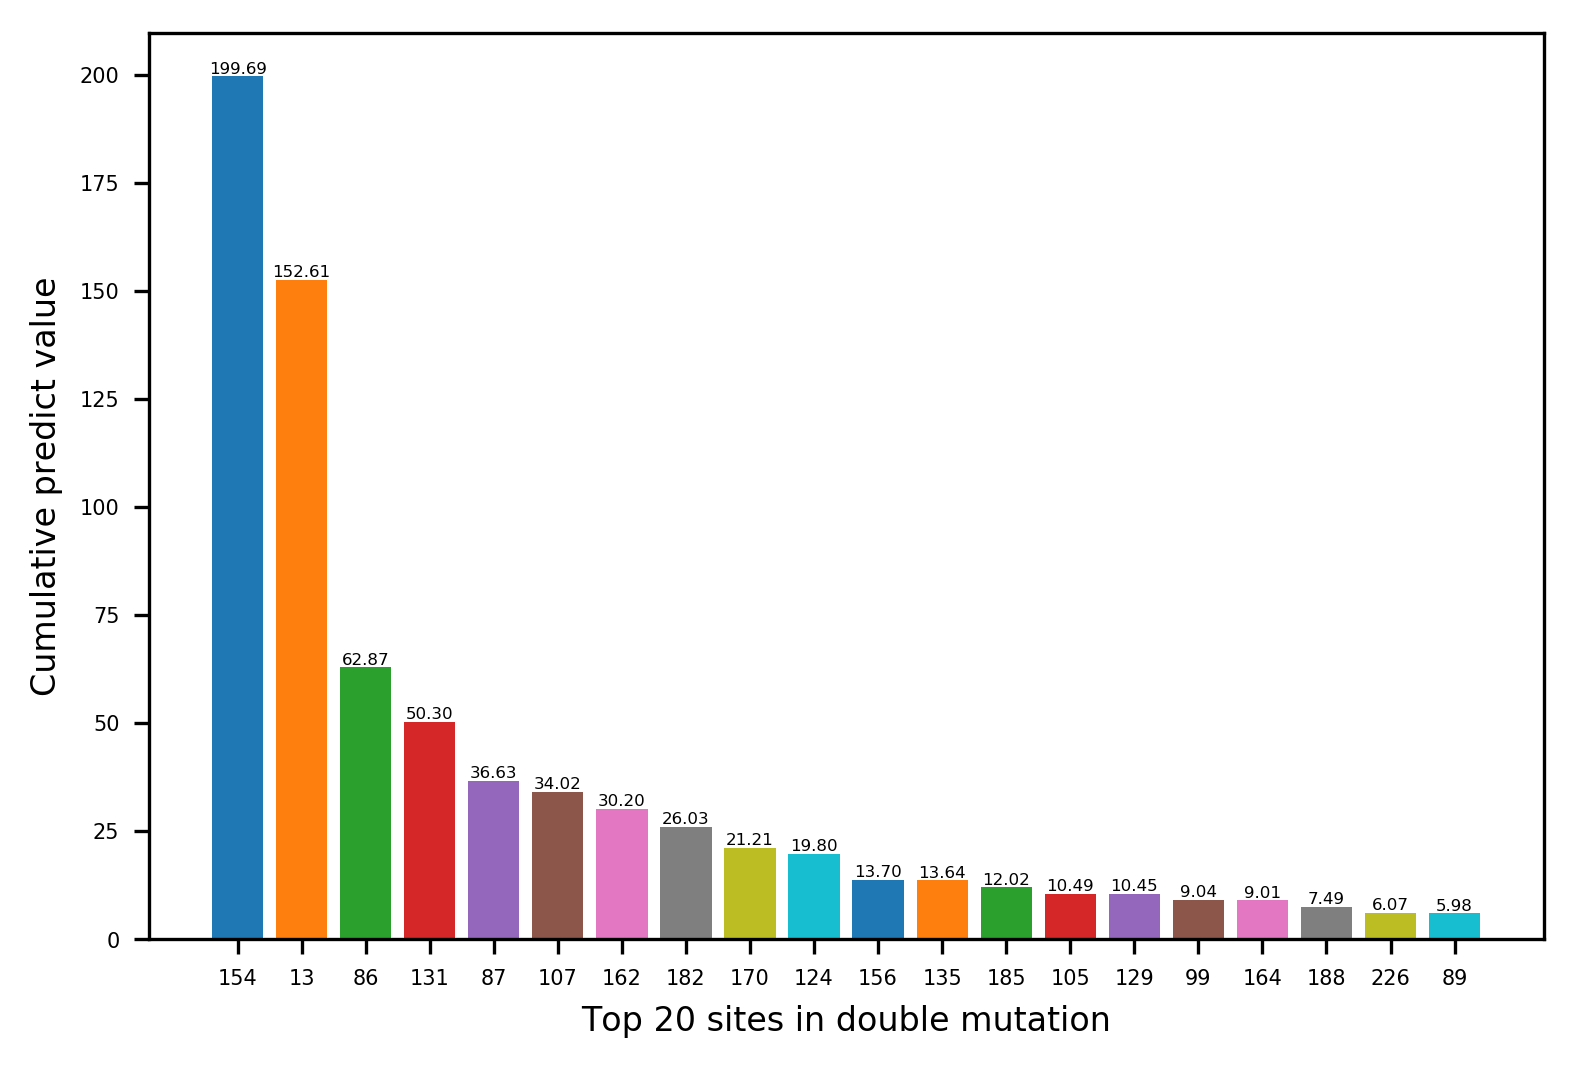

In [15]:
'''
从前258个突变株中找出出现次数最多的突变位点和对应的突变氨基酸
'''
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

model_name = "PtsRep"
input_path = f"/share/jake/github/low_n_output/method_2/temp/{model_name}_method2_use_bright_1_train_num_1000_top258_double_mutations_seed_0.csv"
all_datas = pd.read_csv(input_path)
mut_pos_list = list(all_datas["mutation_pos"])
mut_num_dict = {}
for mut_pos in mut_pos_list:
    mut_list = mut_pos.split(" ")
    for pos in mut_list:
        if pos in mut_num_dict.keys():
            mut_num_dict[pos] += 1
        else:
            mut_num_dict[pos] = 1
for i in range(239):# avGFP长度
    if str(i) in mut_num_dict.keys():
        continue
    else:
        mut_num_dict[str(i)] = 0
# print(mut_num_dict)
mut_num_dict_new = {}
for i in range(239):
    mut_num_dict_new[str(i)] = mut_num_dict[str(i)]
# print(mut_num_dict_new)
mut_fit_dict = {}
for i in range(238):
    mut_fit_dict[str(i)] = 0
for i in tqdm(range(238)):
    for mut_pos in mut_pos_list:
        if str(i) in mut_pos.split(" "):
            fitness = list(all_datas[all_datas["mutation_pos"] == mut_pos][f"{model_name}_predict"])[0]
            # print(fitness)
            if str(i) in mut_fit_dict.keys():
                mut_fit_dict[str(i)] += fitness
            else:
                mut_fit_dict[str(i)] = fitness
# print(mut_fit_dict)
mut_ave_fit_dict = {}
for i in range(238):
    if mut_num_dict_new[str(i)] == 0:
        mut_ave_fit_dict[str(i)] = 0
    else:
        mut_ave_fit_dict[str(i)] = mut_fit_dict[str(i)] / mut_num_dict_new[str(i)]

def bubble_sort(lst_1, lst_2):
    n = len(lst_1)
    for i in range(n):
        for j in range(1, n - i):
            if lst_1[j - 1] > lst_1[j]:
                lst_1[j - 1], lst_1[j] = lst_1[j], lst_1[j - 1]
                lst_2[j - 1], lst_2[j] = lst_2[j], lst_2[j - 1]
    return lst_1, lst_2

target_name = list(mut_fit_dict.keys())
target_fitness = list(mut_fit_dict.values())
target_fitness, target_name = bubble_sort(target_fitness, target_name)

top_10_target_name = target_name[-20:] # 找出出现次数最多的23个位点，可以指点个数。
top_10_target_fitness = target_fitness[-20:] # 与上一个 top_10_target_name 对应，对应的数值是出现该突变位点的全部突变株预测值的累加。
top_10_target_name.reverse()
top_10_target_fitness.reverse()
print(top_10_target_name)
print(top_10_target_fitness)

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams.update({'font.size': 5})
for i, name in enumerate(top_10_target_name):
    plt.bar(str(name),top_10_target_fitness[i])
    plt.text(str(name), top_10_target_fitness[i], "%.2f" % top_10_target_fitness[i], ha="center", va="bottom", fontsize=4)
# plt.title("Use 157 experimental data", fontsize=10)
plt.xlabel("Top 20 sites in double mutation", fontsize=8)
plt.ylabel("Cumulative predict value", fontsize=8)
plt.show()

In [6]:
'''
将预测值最高的258个双突变体中全部的突变位点统计出来，并且统计每个位点对应的突变氨基酸。
'''
import pandas as pd
from tqdm import tqdm
import Levenshtein
import itertools
import os

input_path = "/share/jake/github/low_n_output/method_2/temp"
# target_df = pd.read_csv(f"{input_path}/eUniRep-Augmenting_method2_top3571_double_mutations_balance_train_set.csv")
target_df = pd.read_csv(f"{input_path}/{model_name}_method2_train_num_1000_top258_double_mutations_seed_0.csv")
# target_df = pd.read_csv(f"{input_path}/ECNet_method2_greater1.04_double_mutations_balance_train_set_1000.csv")

def bubble_sort(lst_1, lst_2):#排序函数
    n = len(lst_1)
    for i in range(n):
        for j in range(1, n - i):
            if lst_1[j - 1] > lst_1[j]:
                lst_1[j - 1], lst_1[j] = lst_1[j], lst_1[j - 1]
                lst_2[j - 1], lst_2[j] = lst_2[j], lst_2[j - 1]
    return lst_1, lst_2


mut_pos_list = target_df["name"].to_list()
target_pos_list_temp = []
for mut_pos in mut_pos_list:
    mut_list = mut_pos.split(" ")
    for pos in mut_list:
        if pos in target_pos_list_temp:
            continue
        else:
            target_pos_list_temp.append(pos)
target_pos_list = []
for pos in target_pos_list_temp:
    target_pos_list.append(int(pos))
target_pos_list.sort()
print(target_pos_list)
print(len(target_pos_list))
mut_num_dict = {}

for i in target_pos_list:
    for mut_pos in mut_pos_list:
        if str(i) in mut_pos.split(" "):
            fitness = list(target_df[target_df["name"] == mut_pos][f"{model_name}_predict"])[0]
            if str(i) in mut_num_dict.keys():
                mut_num_dict[str(i)] += fitness
            else:
                mut_num_dict[str(i)] = fitness
target_name = list(mut_num_dict.keys())
target_fitness = list(mut_num_dict.values())
target_fitness, target_name = bubble_sort(target_fitness, target_name)
# print(target_fitness)
print(target_name)

pos_wt_dict = {}
pos_mut_dict = {}

all_first_pos_list = target_df["first_pos"].to_list()
all_second_pos_list = target_df["second_pos"].to_list()
all_pos_list = all_first_pos_list + all_second_pos_list
for temp_pos in all_pos_list:
    # print(temp_pos.split("_"))
    wt_aa = temp_pos.split("_")[0]
    mut_aa = temp_pos.split("_")[-1]
    mut_pos = temp_pos.split("_")[1]
    if mut_pos in pos_wt_dict.keys():
        # print(temp_pos, wt_aa, pos_wt_dict[temp_pos])
        assert wt_aa == pos_wt_dict[mut_pos]
    else:
        pos_wt_dict[mut_pos] = wt_aa
    if mut_pos in pos_mut_dict.keys():
        if mut_aa in pos_mut_dict[mut_pos]:
            continue
        else:
            pos_mut_dict[mut_pos].append(mut_aa)
    else:
        pos_mut_dict[mut_pos] = [mut_aa]
print(pos_wt_dict) # 突变位点及其对应的野生型氨基酸。
print(pos_mut_dict) # 突变位点及其对应的全部突变氨基酸。

[9, 10, 12, 31, 32, 33, 37, 40, 57, 71, 74, 76, 85, 86, 88, 92, 98, 104, 106, 116, 120, 121, 123, 128, 130, 134, 147, 153, 155, 157, 161, 163, 165, 169, 170, 181, 182, 184, 187, 188, 190, 203, 213, 221, 225]
45
['188', '116', '40', '32', '37', '57', '203', '71', '157', '190', '92', '121', '147', '221', '182', '74', '31', '120', '10', '165', '9', '213', '170', '33', '76', '88', '225', '187', '163', '98', '128', '104', '184', '134', '155', '123', '169', '181', '161', '106', '86', '130', '85', '12', '153']
{'13': 'P', '86': 'S', '107': 'K', '154': 'A', '124': 'E', '87': 'A', '131': 'K', '135': 'N', '99': 'F', '11': 'V', '77': 'H', '162': 'K', '105': 'N', '34': 'E', '10': 'G', '75': 'P', '89': 'P', '129': 'D', '148': 'H', '121': 'N', '122': 'R', '93': 'V', '182': 'Y', '72': 'S', '32': 'E', '58': 'P', '38': 'T', '33': 'G', '41': 'K', '117': 'D', '170': 'N', '156': 'K', '164': 'N', '185': 'N', '226': 'A', '188': 'I', '166': 'K', '171': 'I', '183': 'Q', '214': 'K', '222': 'E', '191': 'G', '15

In [2]:
'''
选择需要固定的突变株，并在此基础上进行三突变位点的组合。
'''
import itertools as it

seed = 0
# method_list = ["max", "top_1%", "top_5%", "top_10%", "top_20%"]
method = "top_1%"#max top_1%
top_model_name = "lin"
model_name = "eUniRep-Augmenting" # eUniRep-Augmenting_concate
n_train_seqs = 1000
sampling_method = "random_1-2"

choose_top_mut_pos_num = -23
fix_pos_num = 9
combina_pos_num = 12
fix_pos_list = [4, 33, 72, 89, 116, 141, 162, 170, 205]#固定突变株的位点
fix_pos_aa = ["N", "V", "H", "K", "G", "Q", "G", "V", "V"]#与位点对应的突变氨基酸
gfp_wt = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"
fix_name = ""
for i in range(len(fix_pos_list)):
    fix_name += f"{fix_pos_list[i]}"
    fix_name += f"{fix_pos_aa[i]}"
    if i < len(fix_pos_list)-1:
        fix_name += " "
print("fix_name:", fix_name)

top_pos_temp = target_name[choose_top_mut_pos_num:]
top_pos = []
for i in top_pos_temp:
    top_pos.append(int(i))
top_pos.reverse()
top_rem_fix_pos = top_pos[0:]
for i in fix_pos_list:
    if i in top_rem_fix_pos:
        top_rem_fix_pos.remove(i)
    else:
        print(f"Pos {i} not in top_rem_fix_pos!")
print(len(top_rem_fix_pos))
all_top_comb_3 = list(it.combinations(top_rem_fix_pos, 3))
print(len(all_top_comb_3))

result_dict = {"name": [], "seq": []}
for comb in all_top_comb_3:
    seq = list(gfp_wt)
    name_list = fix_pos_list + list(comb)
    name_list.sort()
    name = ""
    for pos_num in range(len(name_list)):
        name += f"{name_list[pos_num]}"
        if pos_num < len(name_list)-1:
            name += " "
    # name = f"{name_list[0]} {name_list[1]} {name_list[2]} {name_list[3]} {name_list[4]} {name_list[5]} {name_list[6]} {name_list[7]} {name_list[8]}"
    result_dict["name"].append(name)
    for sit in name_list:
        seq[sit] = "_"
    result_dict["seq"].append("".join(seq))
print(len(name_list))
nine_mut_result_df = pd.DataFrame(result_dict) # 根据固定的位点及剩余的 Top23 位点，组合出目标蛋白突变位点的组合。
print(nine_mut_result_df.head())
# nine_mut_result_df.to_csv(f"/share/jake/github/low_n_output/method_2/temp/{model_name}_{top_model_name}_{sampling_method}_train_seqs_num_{n_train_seqs}_do_method3_0_seed_0_fixed_{fix_pos_list[0]}_{fix_pos_list[1]}_{fix_pos_list[2]}_{fix_pos_list[3]}_{fix_pos_list[4]}_{fix_pos_list[5]}_to_nine_mut_Top20_mut_all_comb.csv")

fix_name: 4N 33V 72H 89K 116G 141Q 162G 170V 205V
Pos 4 not in top_rem_fix_pos!
Pos 33 not in top_rem_fix_pos!
Pos 72 not in top_rem_fix_pos!
Pos 89 not in top_rem_fix_pos!
Pos 116 not in top_rem_fix_pos!
Pos 141 not in top_rem_fix_pos!
Pos 205 not in top_rem_fix_pos!
21
1330
12
                                         name  \
0   4 33 72 89 96 116 141 162 169 170 190 205   
1  4 33 72 89 104 116 141 162 169 170 190 205   
2  4 33 72 89 116 141 161 162 169 170 190 205   
3  4 33 72 89 116 141 162 169 170 187 190 205   
4  4 33 72 89 116 141 162 169 170 190 199 205   

                                                 seq  
0  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
1  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
2  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
3  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
4  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  


In [3]:
'''
根据上一步中产生的目标蛋白全部突变位点的组合，并结合每个突变位点对应的突变氨基酸，组合出目标蛋白突变体。
'''
import os
import itertools
import Levenshtein
from pyexpat import model
import pandas as pd
from tqdm import tqdm

seed = 0
# method_list = ["max", "top_1%", "top_5%", "top_10%", "top_20%"]
method = "top_1%"#max top_1%
top_model_name = "lin"
model_name = "eUniRep-Augmenting" # eUniRep-Augmenting_concate
train_num = 1000
fix_pos_list = [4, 33, 72, 89, 116, 141, 162, 170, 205] # 固定突变株的位点
fix_pos_aa = ["N", "V", "H", "K", "G", "Q", "G", "V", "V"] # 与位点对应的突变氨基酸
des_method = f"train_num_1000_concat_exp_data_multiple_change_norm_fix_{fix_name}_to_{combina_pos_num}_mut_Top23_all_comb" # 需要起一个对应的任务名称。
do_method3 = 0
gfp_wt = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"
AA_LIST = ['A', 'C', 'D', 'E', 'F', 
            'G', 'H', 'I', 'K', 'L', 
            'M', 'N', 'P', 'Q', 'R', 
            'S', 'T', 'V', 'W', 'Y']

top_hotspot_df = nine_mut_result_df
top_hotspot_name_list = list(top_hotspot_df["name"])

def combination_3(comb_list_1, comb_list_2, comb_list_3):
    list_1 = []
    for chr_1 in comb_list_1:
        for chr_2 in comb_list_2:
            for chr_3 in comb_list_3:
                list_1.append((chr_1, chr_2, chr_3))
    return list_1


def saturation_mutationv(mutation_pos, template_seq, pos_mut_dict, combina_pos_num):
    mut_pos_list = []
    for pos in mutation_pos.split():
        if int(pos) in fix_pos_list:
            continue
        else:
            mut_pos_list.append(int(pos))
    mutation_list = []
    
    # print(len(combination_3(comb_list_1, comb_list_2, comb_list_3)))
    for amino_list in combination_3(pos_mut_dict[str(mut_pos_list[0] + 1)], pos_mut_dict[str(mut_pos_list[1] + 1)], pos_mut_dict[str(mut_pos_list[2] + 1)]):
        seq = list(template_seq)
        for i in range(len(fix_pos_list)):
            seq[fix_pos_list[i]] = fix_pos_aa[i]
        for num in range(len(amino_list)):
            # print(seq[mut_pos_list[num]])
            assert seq[mut_pos_list[num]] == "_"
            seq[mut_pos_list[num]] = amino_list[num]
        if Levenshtein.distance(gfp_wt, ''.join(seq)) == combina_pos_num:
            mutation_list.append(''.join(seq))
        else:
            print(mut_pos_list)
            print(djasghafjkhfgka)
    # print(len(mutation_list))
    return mutation_list

def compare_seq(wt_seq, target_seq):
    wt_seq = list(wt_seq)
    target_seq = list(target_seq)
    assert len(wt_seq) == len(target_seq)
    mutation_pos = []
    original_amino = []
    mutation_amino = []
    for i in range(len(wt_seq)):
        if wt_seq[i] != target_seq[i]:
            mutation_pos.append(i)
            original_amino.append(wt_seq[i])
            mutation_amino.append(target_seq[i])
    split_seq = ""
    for i in range(len(mutation_pos)):
        split_seq += f"{original_amino[i]}{mutation_pos[i] + 1}{mutation_amino[i]}"
        if i < len(mutation_pos) - 1:
            split_seq += ";"
    return split_seq

for j, name in tqdm(enumerate(top_hotspot_name_list)):
    df_1 = top_hotspot_df[(top_hotspot_df["name"] == name)]
    template_seq = list(df_1["seq"])[0]
    # print(template_seq)
    mutation_pos = name
    mutation_list = saturation_mutationv(mutation_pos, template_seq, pos_mut_dict, combina_pos_num)
    template_seq_list = []
    name_list = []
    for i in tqdm(range(len(mutation_list))):
        name_list.append(str(i))
        template_seq_list.append(template_seq)
    df_result = pd.DataFrame({"name": name_list, "seq": mutation_list, "template_seq": template_seq_list})
    output_path = f"/share/jake/github/low_n_output/method_2/design_seqs/{top_model_name}/{model_name}_train_num_{train_num}_seed_{seed}_{method}_do_method3_{do_method3}_des_method_{des_method}"
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    df_result.to_csv(f"{output_path}/{name}.csv") # 目标蛋白的突变体以不同的位点组合为单位保存
print(df_result.head())

1330it [00:09, 135.80it/s]


  name                                                seq  \
0    0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
1    1  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
2    2  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
3    3  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
4    4  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   

                                        template_seq  
0  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
1  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
2  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
3  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  
4  MSKG_ELFTGVVPILVELDGDVNGHKFSVSGEG_GDATYGKLTLKF...  


In [8]:
'''
下面的部分为经过模型预测后的后期处理。
将预测后的、以目标蛋白突变位点组合为单位的突变体文件，整合到一个 dataframe 中。
'''
import pandas as pd
from tqdm import tqdm
import os
result_output_path = f"/share/jake/github/low_n_output/method_2/design_seqs_result/lin/eUniRep-Augmenting_train_num_1000_seed_0_top_1%_do_method3_0_des_method_train_num_1000_concat_exp_data_multiple_change_norm_fix_4N 33V 72H 89K 116G 141Q 162G 170V 205V_to_12_mut_Top23_all_comb"
all_file_list = os.listdir(result_output_path)
all_triple_mut_df = pd.DataFrame()
df_len = 0
for file_name in tqdm(all_file_list):
    temp_df = pd.read_csv(os.path.join(result_output_path, file_name))
    if len(temp_df) > df_len:
        df_len = len(temp_df)
    all_triple_mut_df = pd.concat([all_triple_mut_df, temp_df])
# all_triple_mut_df.sort_values(by='prediction', ascending=False, inplace=True)
print(len(all_triple_mut_df), df_len)
print(all_triple_mut_df.head())

100%|██████████| 1330/1330 [00:23<00:00, 56.43it/s]

17212 80
   Unnamed: 0  name                                                seq  \
0           0     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
1           1     2  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
2           2     6  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
3           3     1  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   
4           4     4  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...   

   eUniRep-Augmenting_lin_predict                               mutation_pos  \
0                        1.258317  4 33 62 72 89 104 116 141 162 170 205 213   
1                        1.255544  4 33 62 72 89 104 116 141 162 170 205 213   
2                        1.254436  4 33 62 72 89 104 116 141 162 170 205 213   
3                        1.254382  4 33 62 72 89 104 116 141 162 170 205 213   
4                        1.254279  4 33 62 72 89 104 116 141 162 170 205 213   

            original_amino           mutation_amino  
0  E E T R 

In [9]:
gfp_wt = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"

def compare_seq(wt_seq, target_seq):
    wt_seq = list(wt_seq)
    target_seq = list(target_seq)
    assert len(wt_seq) == len(target_seq)
    mutation_pos = []
    original_amino = []
    mutation_amino = []
    for i in range(len(wt_seq)):
        if wt_seq[i] != target_seq[i]:
            mutation_pos.append(i)
            original_amino.append(wt_seq[i])
            mutation_amino.append(target_seq[i])
    return mutation_pos, original_amino, mutation_amino

def compare_des_seqs(df:pd.DataFrame):
    
    df.sort_values(by = 'eUniRep-Augmenting_lin_predict', ascending=False, inplace = True)
    df = df.reset_index(drop = True)
    name_list = list(df["name"])
    seq_list = list(df["seq"])
    qfunc_list = list(df['eUniRep-Augmenting_lin_predict'])
    # target_seq = list(df["seq"])[0]
    mutation_pos_list = []
    original_amino_list = []
    mutation_amino_list = []
    for target_seq in tqdm(seq_list):
        mutation_pos, original_amino, mutation_amino = compare_seq(gfp_wt, target_seq)
        # print(mutation_pos, original_amino, mutation_amino)
        mutation_pos_str = ""
        original_amino_str = ""
        mutation_amino_str = ""
        for i in range(len(mutation_pos)):
            mutation_pos_str += str(mutation_pos[i])
            original_amino_str += str(original_amino[i])
            mutation_amino_str += str(mutation_amino[i])
            if i < len(mutation_pos) - 1:
                    mutation_pos_str += " "
                    original_amino_str += " "
                    mutation_amino_str += " "
        mutation_pos_list.append(mutation_pos_str)
        original_amino_list.append(original_amino_str)
        mutation_amino_list.append(mutation_amino_str)
    df_output = pd.DataFrame({"name": name_list, "mutation": seq_list, "prediction": qfunc_list, "mutation_pos": mutation_pos_list, "original_amino": original_amino_list, "mutation_amino": mutation_amino_list})
    return df_output
all_triple_mut_df = compare_des_seqs(all_triple_mut_df)
print(all_triple_mut_df.head())

  0%|          | 0/17212 [00:00<?, ?it/s]

100%|██████████| 17212/17212 [00:00<00:00, 33224.60it/s]

   name                                           mutation  prediction  \
0     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.302523   
1     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.298297   
2     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.297705   
3     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.296480   
4     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.295964   

                                 mutation_pos           original_amino  \
0  4 33 72 89 116 141 161 162 169 170 172 205  E E R E D E K V N I D A   
1  4 33 72 89 116 141 162 169 170 172 190 205  E E R E D E V N I D G A   
2  4 33 72 89 116 141 162 169 170 172 187 205  E E R E D E V N I D I A   
3  4 33 72 89 116 141 162 169 170 190 199 205  E E R E D E V N I G Y A   
4  4 33 72 89 116 141 161 162 169 170 187 205  E E R E D E K V N I I A   

            mutation_amino  
0  N V H K G Q Q G S V G V  
1  N V H K G Q G S V G S V  
2  N V H K G Q G S V G 

In [10]:
'''
根据突变株的突变信息，将每个突变位点按照“野生型氨基酸_突变位点_突变后的氨基酸”分开表示（为了方便复制到PPT上）。
'''
all_triple_mut_df.to_csv("/share/jake/github/low_n_output/method_2/top_258/eUniRep-Augmenting_train_num_1000_seed_0_top_1%_des_method_des_method_train_num_1000_concat_exp_data_multiple_change_norm_fix_4N_33V_72H_89K_116G_141Q_162G_170V_205V_to_12_mut_Top23_top_1000.csv")
top_50_df = all_triple_mut_df[:50]
top_50_mutation_pos = top_50_df["mutation_pos"].to_list()
top_50_original_amino = top_50_df["original_amino"].to_list()
top_50_mutation_amino = top_50_df["mutation_amino"].to_list()
max_mut_num = len(top_50_mutation_pos[0].split(" "))
print(f"{max_mut_num} mut result!")
for i in range(max_mut_num):
    classfy_mut_list = []
    for j in range(len(top_50_df)):
        pos_mut = top_50_mutation_pos[j].split(" ")[i]
        wt = top_50_original_amino[j].split(" ")[i]
        mut = top_50_mutation_amino[j].split(" ")[i]
        classfy_mut_list.append(f"{wt}{int(pos_mut)+1}{mut}")
    top_50_df[f"classfy_mut_list_{i}"] = classfy_mut_list
print(top_50_df.head())
top_50_df.to_csv("/share/jake/github/low_n_output/method_2/top_258/eUniRep-Augmenting_train_num_1000_seed_0_top_1%_des_method_train_num_1000_concat_exp_data_multiple_change_norm_fix_4N_33V_72H_89K_116G_141Q_162G_170V_205V_to_12_mut_Top23_top_50_triple_mut.csv")

12 mut result!


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


   name                                           mutation  prediction  \
0     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.302523   
1     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.298297   
2     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.297705   
3     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.296480   
4     0  MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKF...    1.295964   

                                 mutation_pos           original_amino  \
0  4 33 72 89 116 141 161 162 169 170 172 205  E E R E D E K V N I D A   
1  4 33 72 89 116 141 162 169 170 172 190 205  E E R E D E V N I D G A   
2  4 33 72 89 116 141 162 169 170 172 187 205  E E R E D E V N I D I A   
3  4 33 72 89 116 141 162 169 170 190 199 205  E E R E D E V N I G Y A   
4  4 33 72 89 116 141 161 162 169 170 187 205  E E R E D E K V N I I A   

            mutation_amino classfy_mut_list_0 classfy_mut_list_1  \
0  N V H K G Q Q G S V G V                

In [10]:
all_triple_mut_df.to_csv("/share/jake/github/low_n_output/method_2/top_258/eUniRep-Augmenting_train_num_1000_seed_0_top_1%_des_method_des_method_train_num_1000_concat_exp_datas_fix_4N_33V_72H_89K_116G_141Q_162G_170V_205V_to_12_mut_Top23_top_1000.csv")
top_50_df = all_triple_mut_df[:50]
top_50_mutation_pos = top_50_df["mutation_pos"].to_list()
top_50_original_amino = top_50_df["original_amino"].to_list()
top_50_mutation_amino = top_50_df["mutation_amino"].to_list()
classfy_mut_list_first = []
classfy_mut_list_second = []
classfy_mut_list_third = []
classfy_mut_list_fore = []
classfy_mut_list_five = []
classfy_mut_list_six = []
classfy_mut_list_seven = []
classfy_mut_list_eight = []
classfy_mut_list_nine = []
for i in range(len(top_50_df)):
    first_pos = top_50_mutation_pos[i].split(" ")[0]
    second_pos = top_50_mutation_pos[i].split(" ")[1]
    third_pos = top_50_mutation_pos[i].split(" ")[2]
    first_wt = top_50_original_amino[i].split(" ")[0]
    second_wt = top_50_original_amino[i].split(" ")[1]
    third_wt = top_50_original_amino[i].split(" ")[2]
    first_mut = top_50_mutation_amino[i].split(" ")[0]
    second_mut = top_50_mutation_amino[i].split(" ")[1]
    third_mut = top_50_mutation_amino[i].split(" ")[2]

    fore_pos = top_50_mutation_pos[i].split(" ")[3]
    five_pos = top_50_mutation_pos[i].split(" ")[4]
    six_pos = top_50_mutation_pos[i].split(" ")[5]
    fore_wt = top_50_original_amino[i].split(" ")[3]
    five_wt = top_50_original_amino[i].split(" ")[4]
    six_wt = top_50_original_amino[i].split(" ")[5]
    fore_mut = top_50_mutation_amino[i].split(" ")[3]
    five_mut = top_50_mutation_amino[i].split(" ")[4]
    six_mut = top_50_mutation_amino[i].split(" ")[5]

    seven_pos = top_50_mutation_pos[i].split(" ")[6]
    eight_pos = top_50_mutation_pos[i].split(" ")[7]
    nine_pos = top_50_mutation_pos[i].split(" ")[8]
    seven_wt = top_50_original_amino[i].split(" ")[6]
    eight_wt = top_50_original_amino[i].split(" ")[7]
    nine_wt = top_50_original_amino[i].split(" ")[8]
    seven_mut = top_50_mutation_amino[i].split(" ")[6]
    eight_mut = top_50_mutation_amino[i].split(" ")[7]
    nine_mut = top_50_mutation_amino[i].split(" ")[8]

    ten_pos = top_50_mutation_pos[i].split(" ")[9]
    eleven_pos = top_50_mutation_pos[i].split(" ")[10]
    twelve_pos = top_50_mutation_pos[i].split(" ")[11]
    ten_wt = top_50_original_amino[i].split(" ")[9]
    eleven_wt = top_50_original_amino[i].split(" ")[10]
    twelve_wt = top_50_original_amino[i].split(" ")[11]
    ten_mut = top_50_mutation_amino[i].split(" ")[9]
    eleven_mut = top_50_mutation_amino[i].split(" ")[10]
    twelve_mut = top_50_mutation_amino[i].split(" ")[11]

    classfy_mut_list_first.append(f"{first_wt}{int(first_pos)+1}{first_mut}")
    classfy_mut_list_second.append(f"{second_wt}{int(second_pos)+1}{second_mut}")
    classfy_mut_list_third.append(f"{third_wt}{int(third_pos)+1}{third_mut}")

    classfy_mut_list_fore.append(f"{fore_wt}{int(fore_pos)+1}{fore_mut}")
    classfy_mut_list_five.append(f"{five_wt}{int(five_pos)+1}{five_mut}")
    classfy_mut_list_six.append(f"{six_wt}{int(six_pos)+1}{six_mut}")

    classfy_mut_list_seven.append(f"{seven_wt}{int(seven_pos)+1}{seven_mut}")
    classfy_mut_list_eight.append(f"{eight_wt}{int(eight_pos)+1}{eight_mut}")
    classfy_mut_list_nine.append(f"{nine_wt}{int(nine_pos)+1}{nine_mut}")

    classfy_mut_list_seven.append(f"{seven_wt}{int(seven_pos)+1}{seven_mut}")
    classfy_mut_list_eight.append(f"{eight_wt}{int(eight_pos)+1}{eight_mut}")
    classfy_mut_list_nine.append(f"{nine_wt}{int(nine_pos)+1}{nine_mut}")

top_50_df["classfy_mut_list_first"] = classfy_mut_list_first
top_50_df["classfy_mut_list_second"] = classfy_mut_list_second
top_50_df["classfy_mut_list_third"] = classfy_mut_list_third

top_50_df["classfy_mut_list_fore"] = classfy_mut_list_fore
top_50_df["classfy_mut_list_five"] = classfy_mut_list_five
top_50_df["classfy_mut_list_six"] = classfy_mut_list_six

top_50_df["classfy_mut_list_seven"] = classfy_mut_list_seven
top_50_df["classfy_mut_list_eight"] = classfy_mut_list_eight
top_50_df["classfy_mut_list_nine"] = classfy_mut_list_nine
print(top_50_df.head())
top_50_df.to_csv("/share/jake/github/low_n_output/method_2/top_258/eUniRep-Augmenting_train_num_1000_seed_0_top_1%_des_method_train_num_1000_concat_exp_datas_fix_4N_33V_72H_89K_116G_141Q_162G_170V_205V_to_12_mut_Top23_top_50_triple_mut.csv")

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

ValueError: Length of values does not match length of index

In [33]:
print(pos_mut_dict["105"])
print(pos_mut_dict["128"])
print(pos_mut_dict["190"])
print(gfp_wt[189])
saturation_mutationv(mutation_pos, template_seq, pos_mut_dict["72"], pos_mut_dict["97"], pos_mut_dict["105"], combina_pos_num)

['Y', 'I', 'D', 'K', 'S']
['F', 'M', 'S', 'T', 'N']
['N', 'G', 'V']
D


['MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSHYPDHMKQHDFFKSAMPKGYVQERGIFFKDDGNYKTRAEVKFEGGTLVNRIALKGIDFKEDGNILGHKLQYNYNSHNVYIMADKQKNGIKGNFKIRHNVEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTYSVLSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
 'MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSHYPDHMKQHDFFKSAMPKGYVQERGIFFKDDGNYKTRAEVKFEGGTLVNRIALKGIDFKEDGNILGHKLQYNYNSHNVYIMADKQKNGIKGNFKIRHNVEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTISVLSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
 'MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSHYPDHMKQHDFFKSAMPKGYVQERGIFFKDDGNYKTRAEVKFEGGTLVNRIALKGIDFKEDGNILGHKLQYNYNSHNVYIMADKQKNGIKGNFKIRHNVEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTDSVLSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
 'MSKGNELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSHYPDHMKQHDFFKSAMPKGYVQERGIFFKDDGNYKTRAEVKFEGGTLVNRIALKGIDFKEDGNILGHKLQYNYNSHNVYIMADKQKNGIKGNFKIRHNVEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTKSVLSKDPNEKRDHMVLLEFVTAAGITHGMDELYK',
 'MSKGNELFTGVVPILVELDGDVNGHK